In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('thane_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Eth-Benzene,MP-Xylene,O,WS,WD,SR,date,day,month,year
0,Thane,92.69,253.96,33.70,87.44,66.75,11.25,27.93,1.74,24.17,...,NaN,23.62,22.33,0.69,201.58,159.99,2019-01-01,1,1,2019
1,Thane,87.21,245.72,48.88,94.23,78.40,12.66,27.56,1.74,31.79,...,NaN,24.19,23.03,0.70,194.71,158.91,2019-02-01,2,1,2019
2,Thane,102.53,346.07,38.34,112.64,81.98,14.47,29.29,1.92,25.88,...,NaN,30.20,23.08,0.75,185.92,147.71,2019-03-01,3,1,2019
3,Thane,103.60,272.50,37.98,105.84,78.18,15.57,26.28,1.83,19.79,...,NaN,31.03,22.63,0.63,190.28,152.70,2019-04-01,4,1,2019
4,Thane,94.85,335.12,31.37,111.33,77.38,16.30,24.49,1.66,24.71,...,NaN,26.76,22.64,0.74,197.14,138.10,2019-05-01,5,1,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City','Eth-Benzene']
data = data.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   PM2_5      186 non-null    float64       
 1   PM10       1436 non-null   float64       
 2   NO         1378 non-null   float64       
 3   NO2        1380 non-null   float64       
 4   NOx        1395 non-null   float64       
 5   NH3        1372 non-null   float64       
 6   SO2        1454 non-null   float64       
 7   CO         1452 non-null   float64       
 8   Ozone      1454 non-null   float64       
 9   Benzene    1369 non-null   float64       
 10  Toluene    1370 non-null   float64       
 11  MP-Xylene  98 non-null     float64       
 12  O          1452 non-null   float64       
 13  WS         1379 non-null   float64       
 14  WD         1383 non-null   float64       
 15  SR         1355 non-null   float64       
 16  date       1551 non-null   datetime64[ns]


In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each colum:')
display(data.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5        1365
PM10          115
NO            173
NO2           171
NOx           156
NH3           179
SO2            97
CO             99
Ozone          97
Benzene       182
Toluene       181
MP-Xylene    1453
O              99
WS            172
WD            168
SR            196
date            0
day             0
month           0
year            0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)
# let's check the data again if there are any missing values
data.isnull().any()

PM2_5        False
PM10         False
NO           False
NO2          False
NOx          False
NH3          False
SO2          False
CO           False
Ozone        False
Benzene      False
Toluene      False
MP-Xylene    False
O            False
WS           False
WD           False
SR           False
date         False
day          False
month        False
year         False
dtype: bool

In [6]:
data.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,MP-Xylene,O,WS,WD,SR,date,day,month,year
0,92.69,253.96,33.70,87.44,66.75,11.25,27.93,1.74,24.17,24.23,140.81,23.62,22.33,0.69,201.58,159.99,2019-01-01,1,1,2019
1,87.21,245.72,48.88,94.23,78.40,12.66,27.56,1.74,31.79,23.79,138.36,24.19,23.03,0.70,194.71,158.91,2019-02-01,2,1,2019
2,102.53,346.07,38.34,112.64,81.98,14.47,29.29,1.92,25.88,30.51,193.34,30.20,23.08,0.75,185.92,147.71,2019-03-01,3,1,2019
3,103.60,272.50,37.98,105.84,78.18,15.57,26.28,1.83,19.79,24.85,140.97,31.03,22.63,0.63,190.28,152.70,2019-04-01,4,1,2019
4,94.85,335.12,31.37,111.33,77.38,16.30,24.49,1.66,24.71,23.95,138.67,26.76,22.64,0.74,197.14,138.10,2019-05-01,5,1,2019


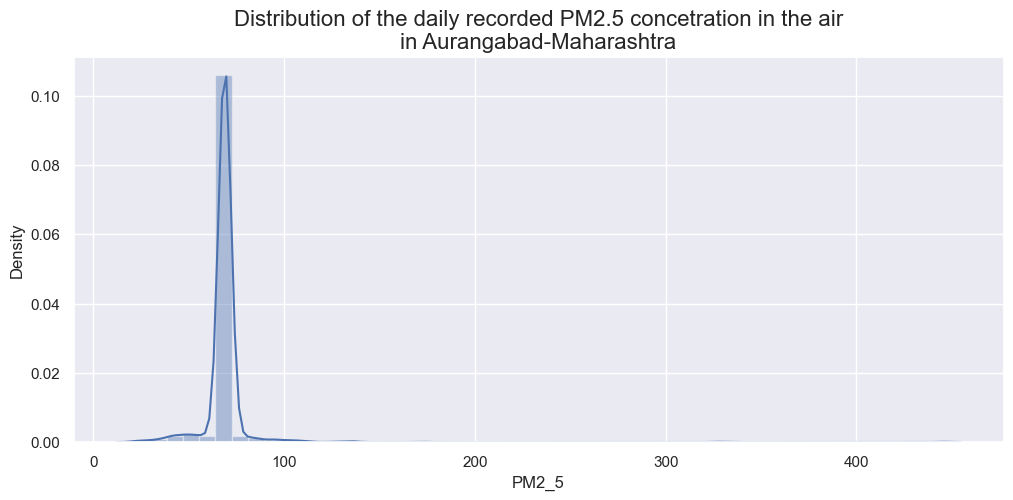

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM2_5'],bins=50)
plt.title('Distribution of the daily recorded PM2.5 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [8]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM2_5']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM2_5'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM2_5']

# display the resulting DataFrame
print(monthly_average)

       median_PM2_5
month              
1              68.9
2              68.9
3              68.9
4              68.9
5              68.9
6              68.9
7              68.9
8              68.9
9              68.9
10             68.9
11             68.9
12             68.9


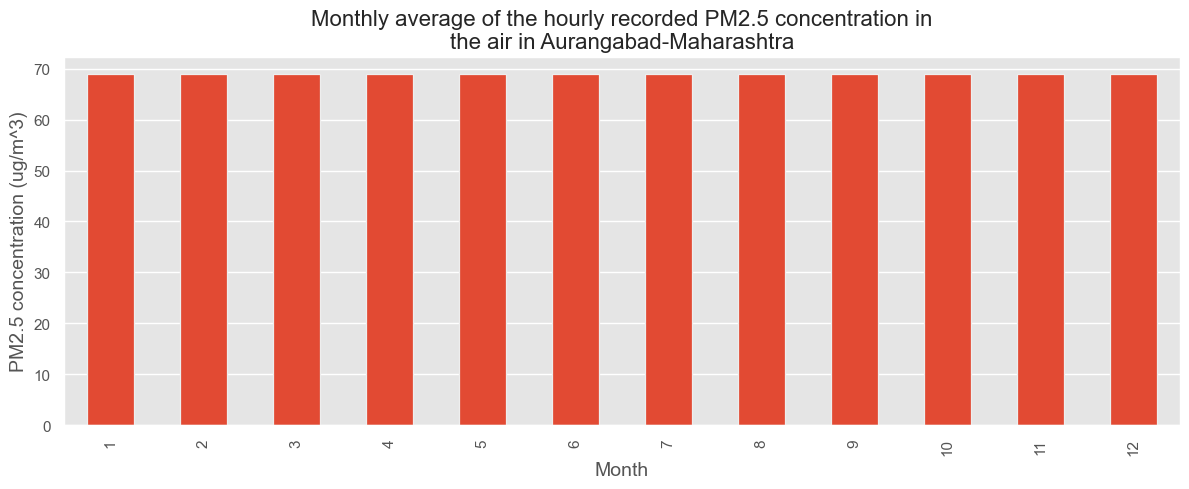

In [9]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

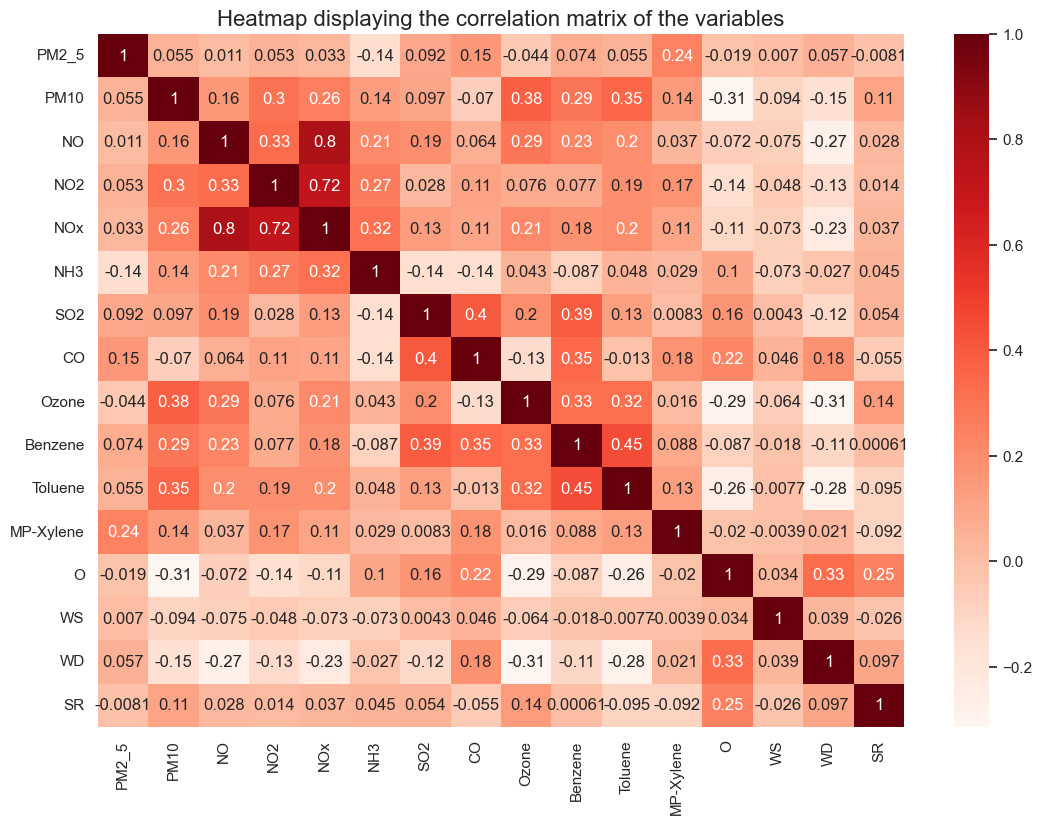

In [10]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene', 'Toluene','MP-Xylene','O','WS','WD','SR']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [11]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const        202.268530
PM2_5          1.111383
PM10           1.532678
NO             4.556588
NO2            3.412368
NOx            8.158321
NH3            1.286799
SO2            1.509798
CO             1.634221
Ozone          1.577921
Benzene        1.778510
Toluene        1.525120
MP-Xylene      1.156879
O              1.596213
WS             1.018743
WD             1.357489
SR             1.204005
dtype: float64

In [12]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,MP-Xylene,O,WS,WD,SR
0,92.69,253.96,33.70,87.44,66.75,11.25,27.93,1.74,24.17,24.23,140.81,23.62,22.33,0.69,201.58,159.99
1,87.21,245.72,48.88,94.23,78.40,12.66,27.56,1.74,31.79,23.79,138.36,24.19,23.03,0.70,194.71,158.91
2,102.53,346.07,38.34,112.64,81.98,14.47,29.29,1.92,25.88,30.51,193.34,30.20,23.08,0.75,185.92,147.71
3,103.60,272.50,37.98,105.84,78.18,15.57,26.28,1.83,19.79,24.85,140.97,31.03,22.63,0.63,190.28,152.70
4,94.85,335.12,31.37,111.33,77.38,16.30,24.49,1.66,24.71,23.95,138.67,26.76,22.64,0.74,197.14,138.10


In [13]:
columns_to_drop = ['WS','WD','SR']

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after


const        185.398897
PM2_5          1.106561
PM10           1.479334
NO             4.498060
NO2            3.409157
NOx            8.146378
NH3            1.281614
SO2            1.465144
CO             1.581539
Ozone          1.499232
Benzene        1.772858
Toluene        1.466954
MP-Xylene      1.145107
O              1.357791
dtype: float64

In [14]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','O','Benzene','Toluene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM2_5'] = np.log(newdata['PM2_5'])

In [15]:
mul_reg = formula.ols(formula="PM2_5 ~ PM10  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone + O + Benzene + Toluene  + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2_5   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     35.02
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           2.26e-72
Time:                        12:00:08   Log-Likelihood:                 971.41
No. Observations:                1551   AIC:                            -1917.
Df Residuals:                    1538   BIC:                            -1847.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7218      0.044     84.541      0.000       3.635       3.808
PM10        2.545e-05   4.77e-05      0.534      0.594   -6.81e-05       0.000
NO          4.048e-05      0.000      0.250      0.803      -0.000       0.000
NO2        -4.651e-06      0.000     -0.030      0.976      -0.000       0.000
NOx            0.0003      0.000      1.305      0.192      -0.000       0.001
NH3           -0.0013      0.000     -9.939      0.000      -0.002      -0.001
SO2            0.0004      0.000      1.676      0.094   -6.43e-05       0.001
CO             0.0176      0.009      1.994      0.046       0.000       0.035
Ozone         -0.0004      0.000     -3.030      0.002      -0.001      -0.000
O           -7.18e-05      0.000     -0.219      0.827      -0.001       0.001
Benzene     5.764e-05    6.4e-05      0.901      0.368   -6.79e-05       0.000
Toluene        0.0312      0.002     14.814      0.000       0.027       0.035
MP_Xylene     -0.0016      0.001     -1.756      0.079      -0.003       0.000
==============================================================================
Omnibus:                      905.469   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247839.920
Skew:                           1.534   Prob(JB):                         0.00
Kurtosis:                      64.852   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM2_5',axis=1)
y = newdata['PM2_5']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,O,Benzene,Toluene,MP_Xylene
0,1.543202,-0.266754,1.204318,0.436102,-0.422635,0.660204,2.299151,-0.582370,0.926786,1.045236,3.685635,-1.222785
1,1.445161,0.084703,1.375452,0.711852,-0.373496,0.639336,2.299151,-0.327766,0.893893,1.005974,4.034081,-1.060608
2,2.639139,-0.159326,1.839452,0.796589,-0.310417,0.736906,2.682952,-0.525235,1.396255,1.887064,7.708051,-1.049024
3,1.763793,-0.167661,1.668067,0.706645,-0.272081,0.567146,2.491051,-0.728717,0.973135,1.047800,8.215438,-1.153280
4,2.508855,-0.320700,1.806435,0.687709,-0.246641,0.466192,2.128572,-0.564327,0.905854,1.010941,5.605146,-1.150964


In [17]:
y.head()

0    4.529261
1    4.468319
2    4.630155
3    4.640537
4    4.552297
Name: PM2_5, dtype: float64

In [18]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [19]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.16982011561123922

Score on test data: 0.2609511425806439


In [20]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.019956405698433516

Overall model accuracy: 0.2609511425806439


In [21]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM2_5',axis=1)
y = ensemble_data['PM2_5']

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [23]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [24]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.4945693654445652

Score on test data: -1.4631215643360438

Root Mean Squared Error: 12.898704024639393

Overall model accuracy: -1.4631215643360438


In [25]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [26]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.12342050290697171

Score on test data: 0.21348896065121814

Best parameters found:


{'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 9,
 'min_samples_split': 7}

Root Mean Squared Error: 7.288792145336135

Overall model accuracy: 0.21348896065121814


In [27]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree.xlsx')

In [28]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [29]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.41918793275730526

Score on test data: 0.22698946125533137

Root Mean Squared Error: 7.225965133649898

Overall model accuracy: 0.22698946125533137


In [30]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [31]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.2517122252383427

Score on test data: 0.3844562820334555

Best parameters found:


{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 7}

Root Mean Squared Error: 6.448112499855323

Overall model accuracy: 0.3844562820334555


In [32]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest.xlsx')

In [33]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [34]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9789445425784401

Score on test data: -0.1440258798752989

Root Mean Squared Error: 8.790651818834384

Overall model accuracy: -0.1440258798752989


In [35]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [36]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9584189812074084

Score on test data: 0.0687480472969123

Best parameters found:


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 4,
 'learning_rate': 0.30000000000000004}

Root Mean Squared Error: 7.93116075297424

Overall model accuracy: 0.0687480472969123


In [37]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost.xlsx')

In [38]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1551 1551


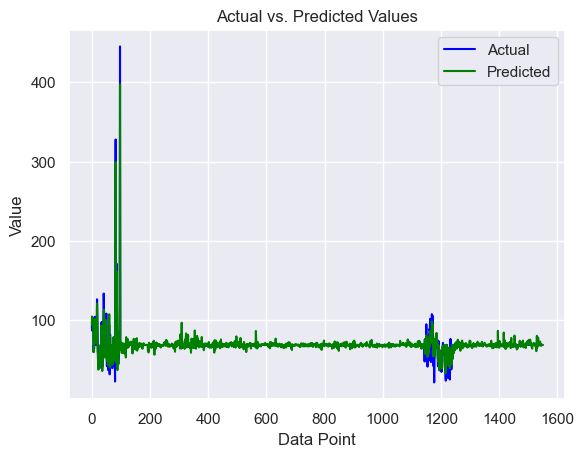

In [41]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, xgpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()
